# Libraries & Data Import

In [1]:
import numpy as np  # NumPy: Library for Numerical Calculations and Handling of Arrays
import pandas as pd  # Pandas:  Manipulation and analysis of structured data
import seaborn as sns  # Seaborn: Advanced data visualization based on Matplotlib
import matplotlib.pyplot as plt  # Matplotlib: Creating Charts and Visualizations

from scipy.stats import norm, skew, kurtosis  # SciPy Stats: Statistical Functions and Distributions, Normal Distribution, skewness and kurtosis

In [2]:
#Import data according to your locations and read the right CSV for each variable. 
df_202301 = pd.read_csv('202301-divvy-tripdata.csv')
df_202302 = pd.read_csv('202302-divvy-tripdata.csv')
df_202303 = pd.read_csv('202303-divvy-tripdata.csv')
df_202304 = pd.read_csv('202304-divvy-tripdata.csv')
df_202305 = pd.read_csv('202305-divvy-tripdata.csv')
df_202306 = pd.read_csv('202306-divvy-tripdata.csv')
df_202307 = pd.read_csv('202307-divvy-tripdata.csv')
df_202308 = pd.read_csv('202308-divvy-tripdata.csv')
df_202309 = pd.read_csv('202309-divvy-tripdata.csv')
df_202310 = pd.read_csv('202310-divvy-tripdata.csv')
df_202311 = pd.read_csv('202311-divvy-tripdata.csv')

#the last database related with the stations that Cyclistc has around Chicago
bike_stations_2017 = pd.read_csv('Divvy_Stations_2017.csv')

# Cleaning & Process of 2023 Database

The 2023 Cyclist data has a standard format, which makes it possible to merge all the individual databases into one and start processing all the 2023 data.

In [3]:
#Merge and reindex of the data
data_raw = pd.concat([df_202301,df_202302,df_202303,df_202304,df_202305,df_202306,df_202307,df_202308,df_202309,df_202310,df_202311])
data_raw.reset_index(drop=True, inplace=True)
data_raw

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495799,30B44BD4C16E688C,classic_bike,2023-11-24 08:39:27,2023-11-24 08:47:03,Clark St & Wellington Ave,TA1307000136,Southport Ave & Wellington Ave,TA1307000006,41.936497,-87.647539,41.935775,-87.663600,member
5495800,094A79892812BAB9,classic_bike,2023-11-06 09:07:20,2023-11-06 09:10:00,Aberdeen St & Jackson Blvd,13157,Peoria St & Jackson Blvd,13158,41.877726,-87.654787,41.877642,-87.649618,member
5495801,F0A7DF8A44FDA3CB,electric_bike,2023-11-10 19:35:30,2023-11-10 19:44:28,Halsted St & Roscoe St,TA1309000025,Southport Ave & Wellington Ave,TA1307000006,41.943687,-87.648855,41.935775,-87.663600,member
5495802,4D5E3685BB913A3C,classic_bike,2023-11-27 09:11:23,2023-11-27 09:13:23,Aberdeen St & Jackson Blvd,13157,Peoria St & Jackson Blvd,13158,41.877726,-87.654787,41.877642,-87.649618,member


In [4]:
#The .info() method is used to get the shape of the dataframe, how many entries and columns there are, and the type data for each column.
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5495804 entries, 0 to 5495803
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 545.1+ MB


In [5]:
# Checks if there are any null values
data_raw.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    840006
start_station_id      840138
end_station_name      891278
end_station_id        891419
start_lat                  0
start_lng                  0
end_lat                 6751
end_lng                 6751
member_casual              0
dtype: int64

Using the information provided by running data_raw.info() & data_raw.isnull(), and according to the main objective, which is to convert casual users into members, I decide to divide the process into 2 stages:
* the first stage to process integer, float and datetime columns to get insights on:
  * General statistics
  * How long was the trip? and statistics on this variable
  * The day and month preferred by casual or member users
* The second stage to process string columns to gain insight into
  * Rideable type preferred by user
  * Top 10 bike start and end stations
  * Top 10 bike start and end stations for casual users.

## Stage 1: process integer, float and datetime columns



In [6]:
#Get datetime64 columns by using pd.to_datetime for 'started_at' and 'ended_at'
data_raw['started_at'] = pd.to_datetime(data_raw['started_at'])
data_raw['ended_at'] = pd.to_datetime(data_raw['ended_at'])

In [7]:
#Create a variable of type timedelta64, this to get the duration of the journey and to be able to do calculations.
data_raw['trip_duration'] = pd.to_timedelta(data_raw['ended_at'] - data_raw['started_at'])
#The dt.total_seconds() function helps us convert a timedelta64 to seconds in float type, it is divided by 60 to get the minutes conversion.
data_raw['minutos'] = data_raw['trip_duration'].dt.total_seconds() / 60
#The dt.day_name() function helps us to get the day of the week from a datetime64 data.
data_raw['day'] = data_raw['started_at'].dt.day_name()
#The dt.month_name() function helps us to get the month of the year from a datetime64 data.
data_raw['month'] = data_raw['started_at'].dt.month_name()
#Sort values from started_at
data_raw = data_raw.sort_values('started_at', ascending=True)
data_raw.reset_index(drop=True, inplace=True)
data_raw

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration,minutos,day,month
0,53F0F248F28485D2,electric_bike,2023-01-01 00:01:58,2023-01-01 00:02:41,NaN,NaN,NaN,NaN,41.800000,-87.590000,41.800000,-87.590000,casual,0 days 00:00:43,0.716667,Sunday,January
1,D8EEE72183269F07,classic_bike,2023-01-01 00:02:06,2023-01-01 00:29:46,Fairbanks Ct & Grand Ave,TA1305000003,New St & Illinois St,TA1306000013,41.891847,-87.620580,41.890847,-87.618617,member,0 days 00:27:40,27.666667,Sunday,January
2,E5AD797A579842F8,electric_bike,2023-01-01 00:03:26,2023-01-01 00:07:23,Sheridan Rd & Loyola Ave,RP-009,Sheridan Rd & Loyola Ave,RP-009,42.001139,-87.661256,42.001044,-87.661198,casual,0 days 00:03:57,3.950000,Sunday,January
3,8FBD2AD70B0F6A6F,classic_bike,2023-01-01 00:04:07,2023-01-01 00:13:56,Leavitt St & Lawrence Ave,TA1309000015,Broadway & Argyle St,13108,41.968885,-87.684001,41.973815,-87.659660,casual,0 days 00:09:49,9.816667,Sunday,January
4,B05BD052B9EBB767,electric_bike,2023-01-01 00:04:27,2023-01-01 00:16:52,Clark St & Montrose Ave,KA1503000022,Clark St & Montrose Ave,KA1503000022,41.961545,-87.666189,41.961588,-87.666036,member,0 days 00:12:25,12.416667,Sunday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495799,75E3EC12050994E3,electric_bike,2023-11-30 23:58:38,2023-12-01 00:05:50,Clinton St & Washington Blvd,WL-012,Morgan Ave & 14th Pl,TA1306000002,41.883507,-87.641432,41.862378,-87.651062,member,0 days 00:07:12,7.200000,Thursday,November
5495800,35FDBFCF6C46F2FD,electric_bike,2023-11-30 23:58:45,2023-12-01 00:00:04,Drexel Ave & 60th St,22005,NaN,NaN,41.785760,-87.604669,41.790000,-87.600000,member,0 days 00:01:19,1.316667,Thursday,November
5495801,AFC21C1DA032AE97,electric_bike,2023-11-30 23:58:47,2023-12-01 00:04:30,NaN,NaN,Milwaukee Ave & Wabansia Ave,13243,41.920000,-87.700000,41.912616,-87.681391,member,0 days 00:05:43,5.716667,Thursday,November
5495802,B704D52ACE90C0AF,electric_bike,2023-11-30 23:58:58,2023-12-01 00:18:20,NaN,NaN,Damen Ave & Foster Ave,KA1504000149,41.920000,-87.660000,41.975615,-87.679459,member,0 days 00:19:22,19.366667,Thursday,November


In [8]:
# Create a column with a value equal to 1, it helps us to do groupings and aggregations in an easier way.
data_raw['count'] = 1

In [9]:
# Columns are ordered using reindex and passing the name of the ordering of the variables as a parameter to columns.
data_raw = data_raw.reindex(columns=['ride_id', 'rideable_type', 'started_at', 'ended_at','trip_duration', 'minutos', 'day', 'month',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'count'])

**Outliers**

Using the .describe() method we can get our location estimates, variance estimates, order statistics and outliers.

In [10]:
data_raw['minutos'].describe()

count    5.495804e+06
mean     1.836362e+01
std      1.841182e+02
min     -1.665652e+04
25%      5.466667e+00
50%      9.616667e+00
75%      1.710000e+01
max      9.848907e+04
Name: minutos, dtype: float64

According to the information provided by the company, trips lasting less than 1 minute are excluded, and trips lasting more than 24 hours are excluded. 24 hours is too many if we want to present statistics, so I decided to set 300 minutes as the maximum.**It should be noted that the lack of context may lead to different treatment of outliers.**

In [11]:
greater_than = data_raw['minutos'] >= 1.0
less_than = data_raw['minutos'] <= 300
data_raw_filter = data_raw[greater_than & less_than]
print(data_raw_filter['minutos'].describe())

count    5.337757e+06
mean     1.482428e+01
std      1.768814e+01
min      1.000000e+00
25%      5.733333e+00
50%      9.866667e+00
75%      1.731667e+01
max      3.000000e+02
Name: minutos, dtype: float64


## Stage 2: process string columns


### Bike stations database process

These data are the data used to merge and complete the null values that there are in each entry for columns realated with start and end statios of each trip, includes name, id, latitude and longitude for each different station.

In [12]:
bike_stations_2017['conteo'] = 1
bike_stations_2017.head()

,id,name_station,city,latitude,longitude,dpcapacity,online_date,conteo
0,2,Buckingham Fountain,Chicago,41.876393,-87.620328,27,06/10/2013 10:43,1
1,3,Shedd Aquarium,Chicago,41.867226,-87.615355,55,06/10/2013 10:44,1
2,4,Burnham Harbor,Chicago,41.856268,-87.613348,23,06/10/2013 10:46,1
3,5,State St & Harrison St,Chicago,41.874053,-87.627716,23,06/10/2013 10:46,1
4,6,Dusable Harbor,Chicago,41.885041,-87.612794,39,06/10/2013 11:18,1


In [13]:
bike_stations_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            585 non-null    int64  
 1   name_station  585 non-null    object 
 2   city          585 non-null    object 
 3   latitude      585 non-null    float64
 4   longitude     585 non-null    float64
 5   dpcapacity    585 non-null    int64  
 6   online_date   585 non-null    object 
 7   conteo        585 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 36.7+ KB


In [14]:
# Remove blanks for each entry if it is a string data
bike_stations_2017 = bike_stations_2017.applymap(lambda x: x.strip() if isinstance(x,str) else x)

In [15]:
# Check if there are typos in city values
bike_stations_2017['city'].unique()

array(['Chicago', 'Evanston', 'Oak Park'], dtype=object)

In [16]:
#code lines to verify if there are duplicates values in name_station
dict_stations = bike_stations_2017.groupby('name_station')['conteo'].sum().to_dict()
bike_stations_2017['name_station_count'] = bike_stations_2017['name_station'].map(dict_stations)
bike_stations_2017['name_station_count'].unique()

array([1])

In [17]:
##code lines to verify if there are duplicates values in id
dict_id = bike_stations_2017.groupby('id')['conteo'].sum().to_dict()
bike_stations_2017['id_count'] = bike_stations_2017['id'].map(dict_id)
bike_stations_2017['id_count'].unique()

array([1])

In [18]:
#Convert latitude and longitude into strings
bike_stations_2017['latitude'] = bike_stations_2017['latitude'].astype('str')
bike_stations_2017['longitude'] = bike_stations_2017['longitude'].astype('str')
#Create coordinates concating latitude and longitude
bike_stations_2017['coordinates'] = bike_stations_2017['latitude'] + ',' + bike_stations_2017['longitude']
#Create columns for latitude and longitude to check their lenght
bike_stations_2017['latitude_count'] = bike_stations_2017['latitude'].str.len()
bike_stations_2017['longitude_count'] = bike_stations_2017['longitude'].str.len()
bike_stations_2017.head()

,id,name_station,city,latitude,longitude,dpcapacity,online_date,conteo,name_station_count,id_count,coordinates,latitude_count,longitude_count
0,2,Buckingham Fountain,Chicago,41.876393,-87.620328,27,06/10/2013 10:43,1,1,1,"41.876393,-87.620328",9,10
1,3,Shedd Aquarium,Chicago,41.86722596,-87.61535539,55,06/10/2013 10:44,1,1,1,"41.86722596,-87.61535539",11,12
2,4,Burnham Harbor,Chicago,41.856268,-87.613348,23,06/10/2013 10:46,1,1,1,"41.856268,-87.613348",9,10
3,5,State St & Harrison St,Chicago,41.874053,-87.627716,23,06/10/2013 10:46,1,1,1,"41.874053,-87.627716",9,10
4,6,Dusable Harbor,Chicago,41.885041,-87.612794,39,06/10/2013 11:18,1,1,1,"41.885041,-87.612794",9,10


In [19]:
#According to how it is composed a latitude and a longitude, it is ok if their length is equal or greater than 6 digits, it is possible to map with this length.
print(bike_stations_2017['latitude_count'].unique())
print(bike_stations_2017['longitude_count'].unique())

[ 9 11 10  8  7]
[10 12 11  9  8  7]


In [20]:
#Drop unnecessary columns, sort columns and reset the index of the dataframe
bike_stations_2017 = bike_stations_2017.drop(columns=(['name_station_count', 'id_count', 'latitude_count','longitude_count' ]))
bike_stations_2017 = bike_stations_2017.reindex(columns=(['id', 'name_station', 'city', 'latitude', 'longitude', 'coordinates', 'dpcapacity', 'online_date', 'conteo']))
bike_stations_2017.reset_index(drop=True, inplace=True)
bike_stations_2017

,id,name_station,city,latitude,longitude,coordinates,dpcapacity,online_date,conteo
0,2,Buckingham Fountain,Chicago,41.876393,-87.620328,"41.876393,-87.620328",27,06/10/2013 10:43,1
1,3,Shedd Aquarium,Chicago,41.86722596,-87.61535539,"41.86722596,-87.61535539",55,06/10/2013 10:44,1
2,4,Burnham Harbor,Chicago,41.856268,-87.613348,"41.856268,-87.613348",23,06/10/2013 10:46,1
3,5,State St & Harrison St,Chicago,41.874053,-87.627716,"41.874053,-87.627716",23,06/10/2013 10:46,1
4,6,Dusable Harbor,Chicago,41.885041,-87.612794,"41.885041,-87.612794",39,06/10/2013 11:18,1
...,...,...,...,...,...,...,...,...,...
580,622,California Ave & Cortez St,Chicago,41.900363,-87.696704,"41.900363,-87.696704",15,4/27/2017 9:17,1
581,623,Michigan Ave & 8th St,Chicago,41.872773,-87.623981,"41.872773,-87.623981",31,6/13/2017 15:23,1
582,624,Dearborn St & Van Buren St,Chicago,41.876268,-87.629155,"41.876268,-87.629155",16,7/26/2017 21:25,1
583,625,Chicago Ave & Dempster St,Evanston,42.041691,-87.680687,"42.041691,-87.680687",15,08/11/2017 16:53,1


### Continuos process of 2023 databse

In [21]:
#Use the .unique() method to check that our "rideable_type" and "member_casual" variables do not contain typos.
print(data_raw_filter['rideable_type'].unique())
print(data_raw_filter['member_casual'].unique())

['classic_bike' 'electric_bike' 'docked_bike']
['member' 'casual']


In [ ]:
#Remove 'Public Rack - ' as it is extra text for bike station names according to the bike_stations_2017 database.
data_raw_filter['start_station_name'] = data_raw_filter['start_station_name'].str.replace('Public Rack - ', '')
data_raw_filter['end_station_name'] = data_raw_filter['end_station_name'].str.replace('Public Rack - ', '')

We will proceed to remove the null values from the database in order to process the variables start_station_name and end_station_id, with the aim of finding insights that will help us to generate good marketing strategies for the conversion of casual users to users with membership. **We could give another treatment to these variables, even create machine learning models and predict missing values according to the variables, however it is impossible due to the lack of context and information.**

In [23]:
#Remove not a number and null values from the entire dataframe
df_nonulls = data_raw_filter.copy()
df_nonulls = df_nonulls.dropna(how='any')
df_nonulls.reset_index(drop=True, inplace=True)
df_nonulls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4074330 entries, 0 to 4074329
Data columns (total 18 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       object         
 2   started_at          datetime64[ns] 
 3   ended_at            datetime64[ns] 
 4   trip_duration       timedelta64[ns]
 5   minutos             float64        
 6   day                 object         
 7   month               object         
 8   start_station_name  object         
 9   start_station_id    object         
 10  end_station_name    object         
 11  end_station_id      object         
 12  start_lat           float64        
 13  start_lng           float64        
 14  end_lat             float64        
 15  end_lng             float64        
 16  member_casual       object         
 17  count               int64          
dtypes: datetime64[ns](2), float64(5), int64(1), object(9), timedel

In [24]:
#df_nonulls['start_lat'] = df_nonulls['start_lat'].astype('str')
#df_nonulls['start_lng'] = df_nonulls['start_lng'].astype('str')
#df_nonulls['end_lat'] = df_nonulls['end_lat'].astype('str')
#df_nonulls['end_lng'] = df_nonulls['end_lng'].astype('str')

# Remove blanks for each entry if it is a string data
df_nonulls = df_nonulls.applymap(lambda x: x.strip() if isinstance(x,str) else x)

In [25]:
#Merge both dataframes to get the solid data from bike_station_2017, this method automatically drops the mismatched values.
df_merged_start_station =  pd.merge(df_nonulls,bike_stations_2017, left_on='start_station_name' ,right_on='name_station')
df_merged_start_station = df_merged_start_station.drop(columns=(['start_station_name','start_station_id', 'end_station_id', 'start_lat', 'start_lng','end_lat', 'end_lng','dpcapacity','online_date', 'conteo']))
df_merged_start_station.rename(columns={'id': 'start_id_station', 'name_station': 'start_name_station', 'city': 'start_city', 'latitude':'start_latitude', 'longitude': 'start_longitude', 'coordinates':'start_coordinates'}, inplace=True)
df_merged_start_station.reset_index(drop=True, inplace=True)
df_merged_start_station.head()

,ride_id,rideable_type,started_at,ended_at,trip_duration,minutos,day,month,end_station_name,member_casual,count,start_id_station,start_name_station,start_city,start_latitude,start_longitude,start_coordinates
0,D8EEE72183269F07,classic_bike,2023-01-01 00:02:06,2023-01-01 00:29:46,0 days 00:27:40,27.666667,Sunday,January,New St & Illinois St,member,1,24,Fairbanks Ct & Grand Ave,Chicago,41.89186,-87.62062,"41.89186,-87.62062"
1,776F6B226016E50A,classic_bike,2023-01-01 00:06:03,2023-01-01 00:29:39,0 days 00:23:36,23.600000,Sunday,January,New St & Illinois St,casual,1,24,Fairbanks Ct & Grand Ave,Chicago,41.89186,-87.62062,"41.89186,-87.62062"
2,4C8E5CB1D55838F1,classic_bike,2023-01-01 00:41:15,2023-01-01 00:46:35,0 days 00:05:20,5.333333,Sunday,January,Fairbanks Ct & Grand Ave,casual,1,24,Fairbanks Ct & Grand Ave,Chicago,41.89186,-87.62062,"41.89186,-87.62062"
3,F48B214D1ED6C35A,classic_bike,2023-01-01 01:29:49,2023-01-01 01:50:29,0 days 00:20:40,20.666667,Sunday,January,Damen Ave & Pierce Ave,member,1,24,Fairbanks Ct & Grand Ave,Chicago,41.89186,-87.62062,"41.89186,-87.62062"
4,5601EA7B875D0828,classic_bike,2023-01-01 01:35:45,2023-01-01 02:12:53,0 days 00:37:08,37.133333,Sunday,January,Fairbanks Ct & Grand Ave,casual,1,24,Fairbanks Ct & Grand Ave,Chicago,41.89186,-87.62062,"41.89186,-87.62062"


In [26]:
#Merge both dataframes to get the solid data from bike_station_2017, this method automatically drops the mismatched values.
df_merged_end_station = pd.merge(df_merged_start_station, bike_stations_2017, left_on='end_station_name', right_on='name_station')
df_merged_end_station = df_merged_end_station.drop(columns=(['end_station_name','dpcapacity','online_date', 'conteo']))
df_merged_end_station.rename(columns={'id': 'end_id_station', 'name_station': 'end_name_station', 'city': 'end_city', 'latitude':'end_latitude', 'longitude': 'end_longitude', 'coordinates': 'end_coordinates'}, inplace=True)
df_merged_end_station.reset_index(drop=True, inplace=True)
df_merged_end_station.head()

,ride_id,rideable_type,started_at,ended_at,trip_duration,minutos,day,month,member_casual,count,...,start_city,start_latitude,start_longitude,start_coordinates,end_id_station,end_name_station,end_city,end_latitude,end_longitude,end_coordinates
0,4C8E5CB1D55838F1,classic_bike,2023-01-01 00:41:15,2023-01-01 00:46:35,0 days 00:05:20,5.333333,Sunday,January,casual,1,...,Chicago,41.89186,-87.62062,"41.89186,-87.62062",24,Fairbanks Ct & Grand Ave,Chicago,41.89186,-87.62062,"41.89186,-87.62062"
1,5601EA7B875D0828,classic_bike,2023-01-01 01:35:45,2023-01-01 02:12:53,0 days 00:37:08,37.133333,Sunday,January,casual,1,...,Chicago,41.89186,-87.62062,"41.89186,-87.62062",24,Fairbanks Ct & Grand Ave,Chicago,41.89186,-87.62062,"41.89186,-87.62062"
2,8813DA2D6706F601,electric_bike,2023-01-02 12:36:41,2023-01-02 12:53:07,0 days 00:16:26,16.433333,Monday,January,casual,1,...,Chicago,41.89186,-87.62062,"41.89186,-87.62062",24,Fairbanks Ct & Grand Ave,Chicago,41.89186,-87.62062,"41.89186,-87.62062"
3,F74704061E9C3F0D,classic_bike,2023-01-08 11:06:32,2023-01-08 11:52:18,0 days 00:45:46,45.766667,Sunday,January,member,1,...,Chicago,41.89186,-87.62062,"41.89186,-87.62062",24,Fairbanks Ct & Grand Ave,Chicago,41.89186,-87.62062,"41.89186,-87.62062"
4,167C9DBBFE5C128E,classic_bike,2023-01-09 12:57:03,2023-01-09 13:13:34,0 days 00:16:31,16.516667,Monday,January,casual,1,...,Chicago,41.89186,-87.62062,"41.89186,-87.62062",24,Fairbanks Ct & Grand Ave,Chicago,41.89186,-87.62062,"41.89186,-87.62062"


# Visualisations

In [27]:
#Create a copy of the last modified dataframe to use this new variable for visualisation purposes.
data_viz = df_merged_end_station.copy()
#Save to CSV file in order to make another visualizasion in other Apps
data_viz.to_csv('route+/2023_data_for_viz.csv')
data_viz.head()

,ride_id,rideable_type,started_at,ended_at,trip_duration,minutos,day,month,member_casual,count,...,start_city,start_latitude,start_longitude,start_coordinates,end_id_station,end_name_station,end_city,end_latitude,end_longitude,end_coordinates
0,4C8E5CB1D55838F1,classic_bike,2023-01-01 00:41:15,2023-01-01 00:46:35,0 days 00:05:20,5.333333,Sunday,January,casual,1,...,Chicago,41.89186,-87.62062,"41.89186,-87.62062",24,Fairbanks Ct & Grand Ave,Chicago,41.89186,-87.62062,"41.89186,-87.62062"
1,5601EA7B875D0828,classic_bike,2023-01-01 01:35:45,2023-01-01 02:12:53,0 days 00:37:08,37.133333,Sunday,January,casual,1,...,Chicago,41.89186,-87.62062,"41.89186,-87.62062",24,Fairbanks Ct & Grand Ave,Chicago,41.89186,-87.62062,"41.89186,-87.62062"
2,8813DA2D6706F601,electric_bike,2023-01-02 12:36:41,2023-01-02 12:53:07,0 days 00:16:26,16.433333,Monday,January,casual,1,...,Chicago,41.89186,-87.62062,"41.89186,-87.62062",24,Fairbanks Ct & Grand Ave,Chicago,41.89186,-87.62062,"41.89186,-87.62062"
3,F74704061E9C3F0D,classic_bike,2023-01-08 11:06:32,2023-01-08 11:52:18,0 days 00:45:46,45.766667,Sunday,January,member,1,...,Chicago,41.89186,-87.62062,"41.89186,-87.62062",24,Fairbanks Ct & Grand Ave,Chicago,41.89186,-87.62062,"41.89186,-87.62062"
4,167C9DBBFE5C128E,classic_bike,2023-01-09 12:57:03,2023-01-09 13:13:34,0 days 00:16:31,16.516667,Monday,January,casual,1,...,Chicago,41.89186,-87.62062,"41.89186,-87.62062",24,Fairbanks Ct & Grand Ave,Chicago,41.89186,-87.62062,"41.89186,-87.62062"


## Minutes Boxplot

Visualisation of a box plot with the variable minutes, remember that in a box plot we can visualise the outliers, percentiles, mean, vmin and vmax.

count   2776885.00
mean         15.14
std          18.66
min           1.00
25%           5.63
50%           9.73
75%          17.43
max         299.97
Name: minutos, dtype: float64


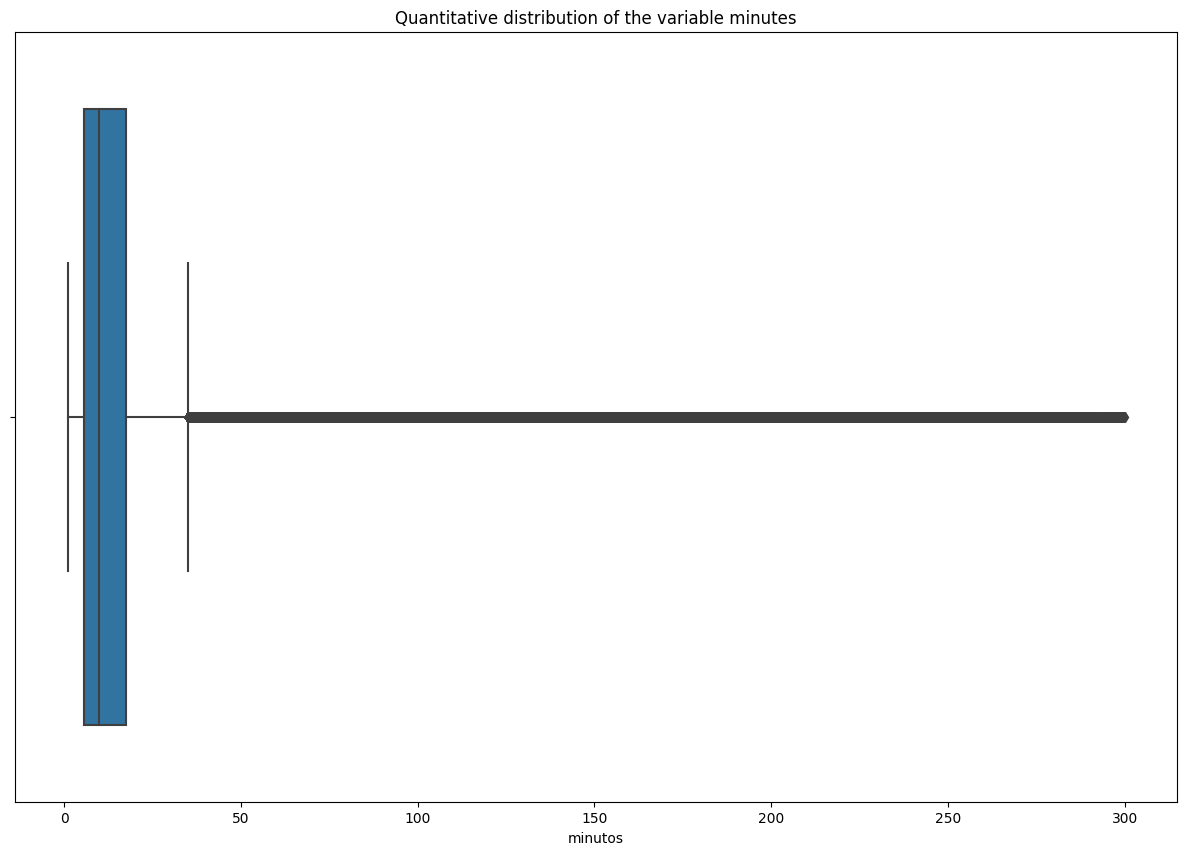

In [28]:
pd.options.display.float_format = '{:.2f}'.format
print(data_viz['minutos'].describe());
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.boxplot(data=data_viz, x='minutos', orient='h');
ax.set_title('Quantitative distribution of the variable minutes');
ax.set(xlabel='Minutes')
plt.show()

## Distribution of Minutes vs. Normal Distribution

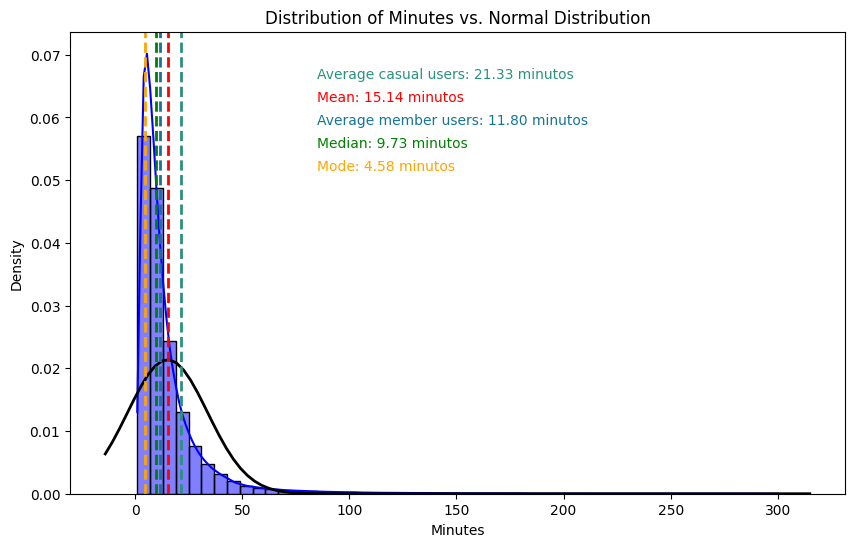

Kurtosis: 39.55842782226535
Skewness: 5.0038712619247825


In [29]:
mean_minutes = data_viz['minutos'].mean()
median_minutes = data_viz['minutos'].median()
mode_minutes = data_viz['minutos'].mode()[0]
std_minutes = data_viz['minutos'].std()
mean_minutes_member_casual = data_viz.groupby('member_casual')['minutos'].mean()
mean_minutes_casual = mean_minutes_member_casual['casual']
mean_minutes_member = mean_minutes_member_casual['member']

#Plotting the histogram and the normal distribution curve
plt.figure(figsize=(10, 6))

# Plotting the distribution of minutes using a histogram
sns.histplot(data_viz['minutos'], bins=50, kde=True, color='blue', stat='density')

# Plotting the normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_minutes, std_minutes)
plt.plot(x, p, 'k', linewidth=2)

# Draw vertical lines for the mean, median and mode of minutes.
plt.axvline(mean_minutes, color='red', linestyle='dashed', linewidth=2)
plt.axvline(median_minutes, color='green', linestyle='dashed', linewidth=2)
plt.axvline(mode_minutes, color='orange', linestyle='dashed', linewidth=2)
plt.axvline(mean_minutes_casual, color='#2A927C', linestyle='dashed', linewidth=2)
plt.axvline(mean_minutes_member, color='#167497', linestyle='dashed', linewidth=2)

# Add text for mean, median and mode minutes
plt.text( 85, plt.ylim()[1] * 0.9, f'Average casual users: {mean_minutes_casual:.2f} minutes', color='#2A927C')
plt.text( 85, plt.ylim()[1] * 0.85, f'Mean: {mean_minutes:.2f} minutes', color='red')
plt.text( 85, plt.ylim()[1] * 0.8, f'Average member users: {mean_minutes_member:.2f} minutes', color='#167497')
plt.text( 85, plt.ylim()[1] * 0.75, f'Median: {median_minutes:.2f} minutes', color='green')
plt.text( 85, plt.ylim()[1] * 0.7, f'Mode: {mode_minutes:.2f} minutes', color='orange')

# tittle and labels
plt.title('Distribution of Minutes vs. Normal Distribution')
plt.xlabel('Minutes')
plt.ylabel('Density')

# Display graphic
plt.show()

# Display kutosis and skewness
print(f'Kurtosis: {kurtosis(data_viz["minutos"])}')
print(f'Skewness: {skew(data_viz["minutos"])}')

In [30]:
mean_minutes_member_casual

member_casual
casual   21.33
member   11.80
Name: minutos, dtype: float64

## Average daily minutes

In [31]:
data_viz.groupby('day')['minutos'].mean().reset_index()
#data_viz.groupby('day')['minutos'].mean().reset_index().sort_values('day', key=lambda x: x.map({'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}))

,day,minutos
0,Friday,14.93
1,Monday,14.32
2,Saturday,18.33
3,Sunday,18.32
4,Thursday,13.55
5,Tuesday,13.57
6,Wednesday,13.21


[Text(0.5, 0, ''), Text(0, 0.5, 'Minutes')]

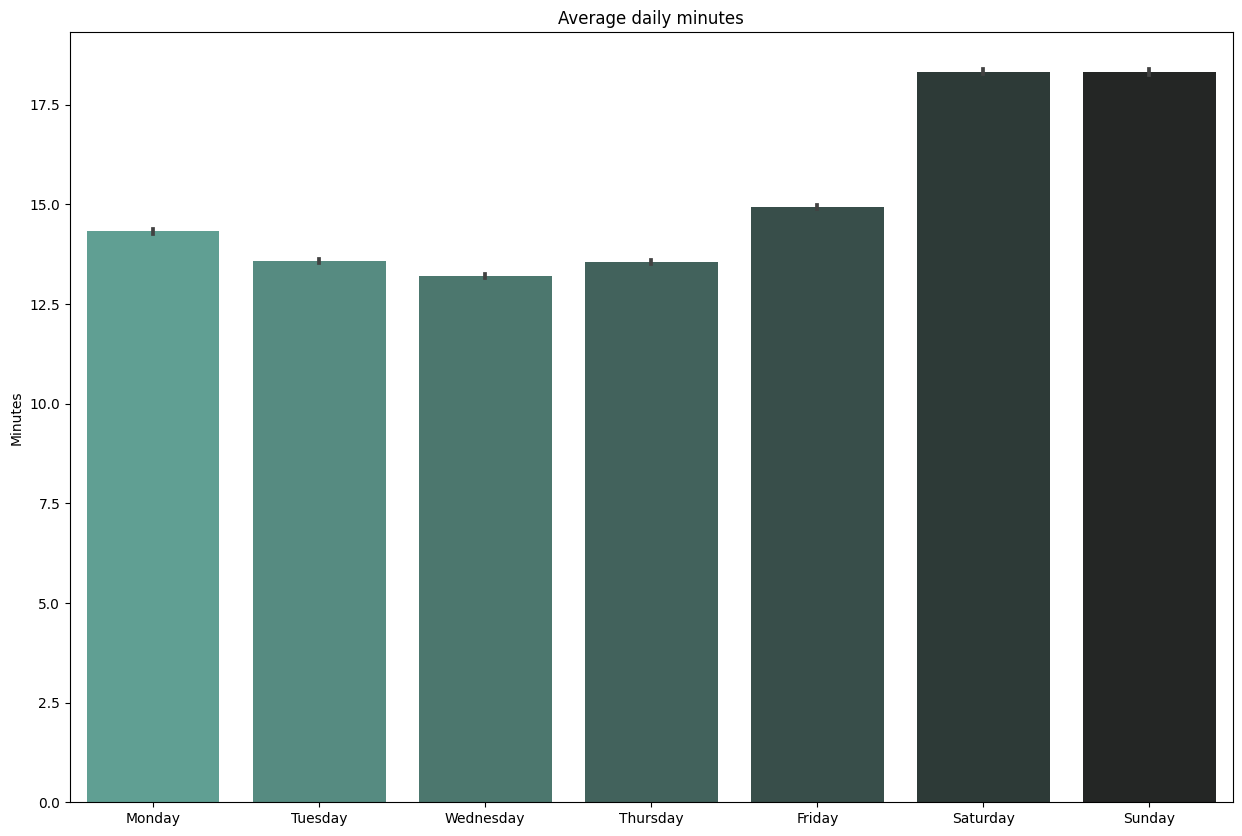

In [32]:
fig, ax = plt.subplots(figsize=(15,10))
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
colors = sns.color_palette("dark:#5A9_r", len(days))

ax = sns.barplot(data=data_viz, x='day', y='minutos', estimator='mean', order=days, palette=colors);

ax.set_title('Average daily minutes')
ax.set(xlabel='', ylabel='Minutes')

In [33]:
data_viz.groupby(['member_casual','day'])['minutos'].mean()

member_casual  day      
casual         Friday      20.77
               Monday      21.11
               Saturday    24.18
               Sunday      24.61
               Thursday    18.57
               Tuesday     19.18
               Wednesday   18.05
member         Friday      11.65
               Monday      11.28
               Saturday    13.20
               Sunday      13.20
               Thursday    11.36
               Tuesday     11.35
               Wednesday   11.28
Name: minutos, dtype: float64

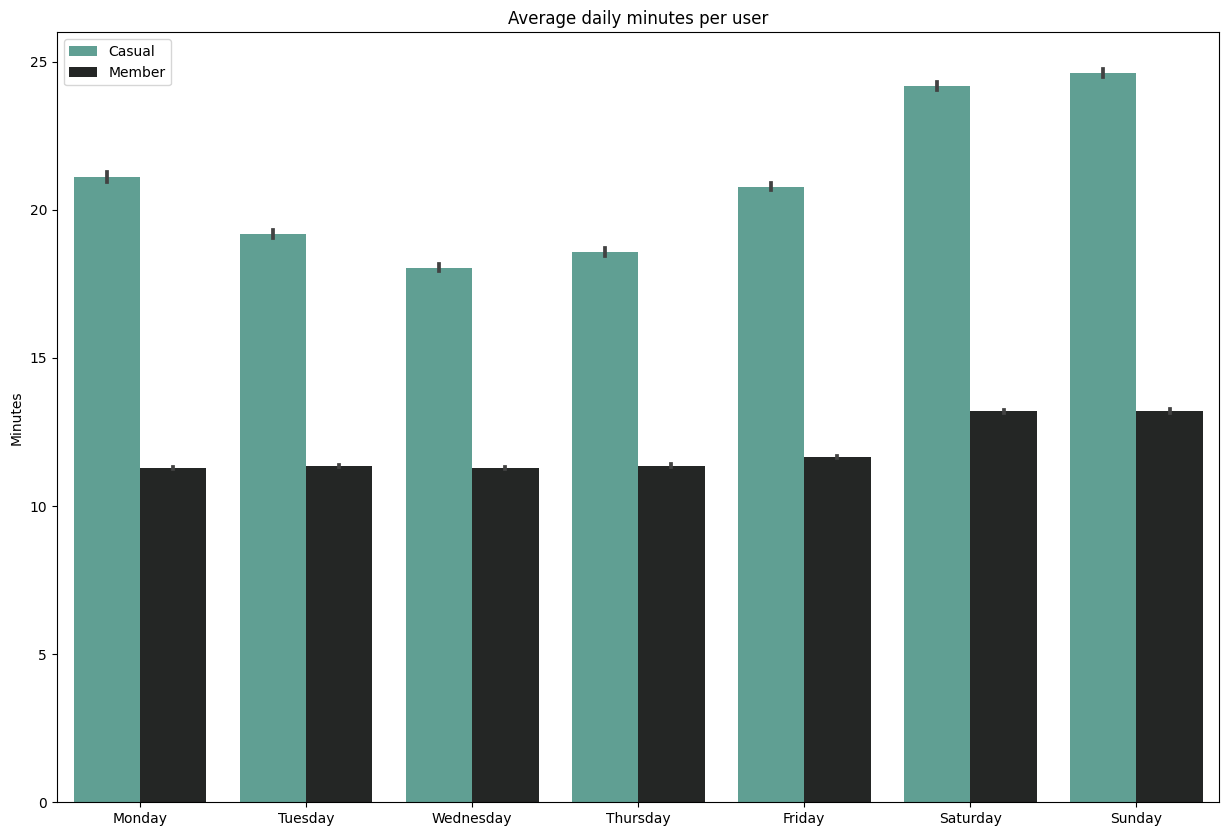

In [34]:
fig, ax = plt.subplots(figsize=(15,10))
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
colors = sns.color_palette("dark:#5A9_r", 2)

ax = sns.barplot(data=data_viz, x='day', y='minutos', estimator='mean',hue='member_casual', order=days, palette=colors);

ax.set_title('Average daily minutes per user')
ax.set(xlabel='', ylabel='Minutes')
plt.legend((ax.containers[0], ax.containers[1]), ('Casual', 'Member'));

## Trips throughout the year

In [35]:
data_viz['month'].value_counts()

August       383801
July         374464
June         352145
September    335676
May          312828
October      269174
April        219439
November     184462
March        137368
February     104221
January      103307
Name: month, dtype: int64

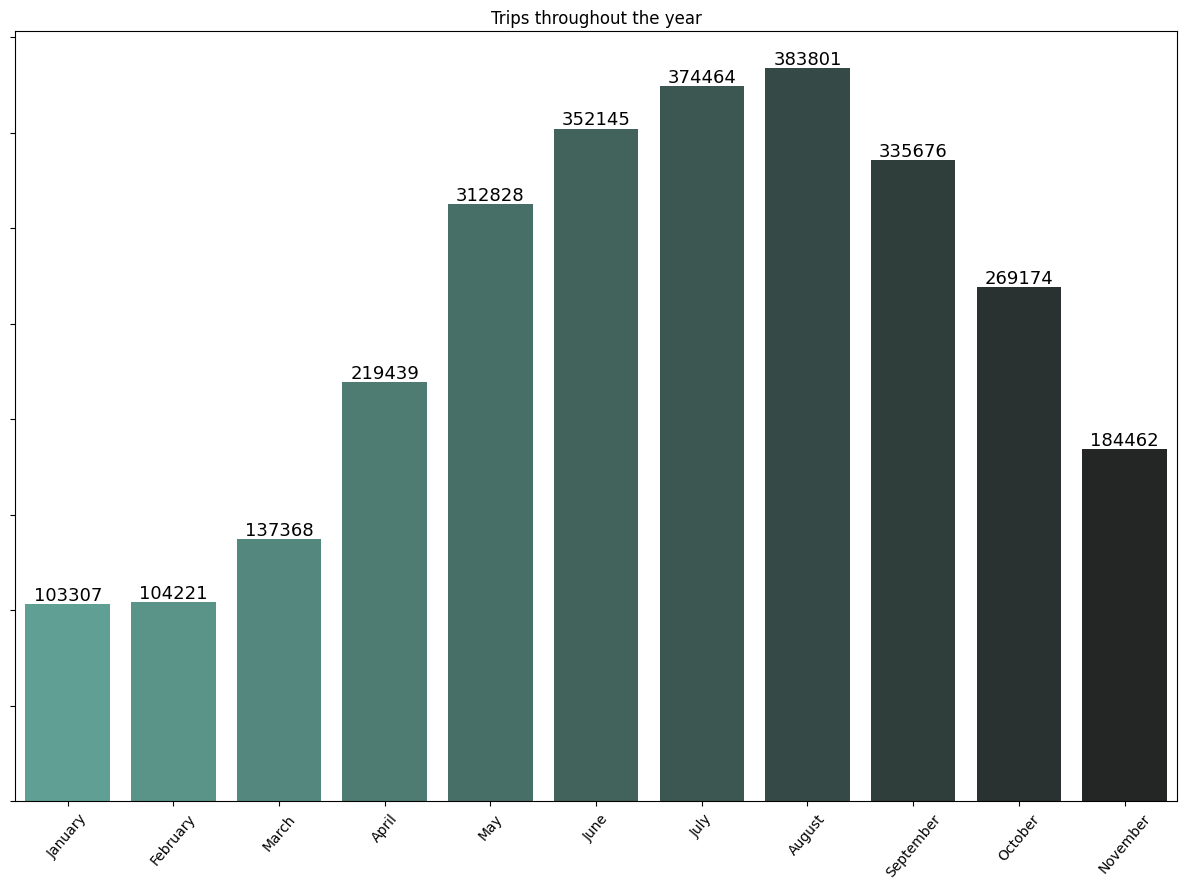

In [36]:
fig, ax = plt.subplots(figsize=(15,10))
meses = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']
colors = sns.color_palette("dark:#5A9_r", len(meses))

ax = sns.barplot(data=data_viz, x='month', y='count', estimator='sum', order=meses, palette=colors)

ax.set_title('Trips throughout the year')
ax.set(ylabel=None, xlabel=None)
ax.set_yticklabels([])
ax.set_xticklabels(ax.get_xticklabels(), rotation=50)
ax.bar_label(ax.containers[0], fontsize=13);

In [37]:
data_viz.groupby(['month', 'member_casual'])['count'].sum().unstack(1)

member_casual,casual,member
month,,
April,72827,146612
August,150296,233505
February,22215,82006
January,20304,83003
July,156655,217809
June,141744,210401
March,31446,105922
May,116820,196008
November,47603,136859


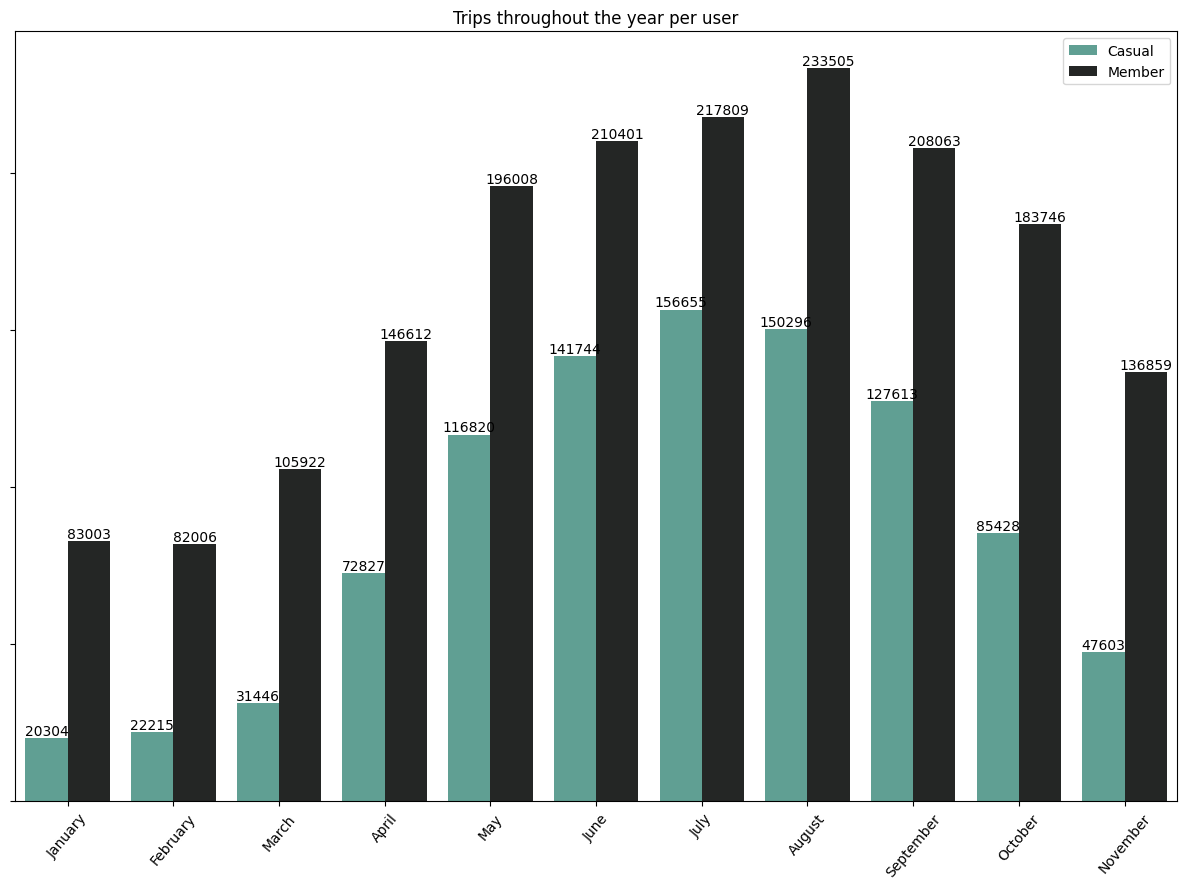

In [38]:
fig, ax = plt.subplots(figsize=(15,10))
meses = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']
colors = sns.color_palette("dark:#5A9_r", 2)

ax = sns.barplot(data=data_viz, x='month', y='count', estimator='sum',hue='member_casual', order=meses, palette=colors)
ax.set_title('Trips throughout the year per user')
ax.set(ylabel=None, xlabel=None)
ax.set_yticklabels([])
ax.set_xticklabels(ax.get_xticklabels(), rotation=50)

ax.bar_label(ax.containers[0], fontsize=8);
ax.bar_label(ax.containers[1], fontsize=8);

plt.legend((ax.containers[0], ax.containers[1]), ('Casual', 'Member'));

In [39]:
data_viz.groupby('day')['count'].sum()

day
Friday       401043
Monday       363975
Saturday     418374
Sunday       358361
Thursday     416546
Tuesday      409247
Wednesday    409339
Name: count, dtype: int64

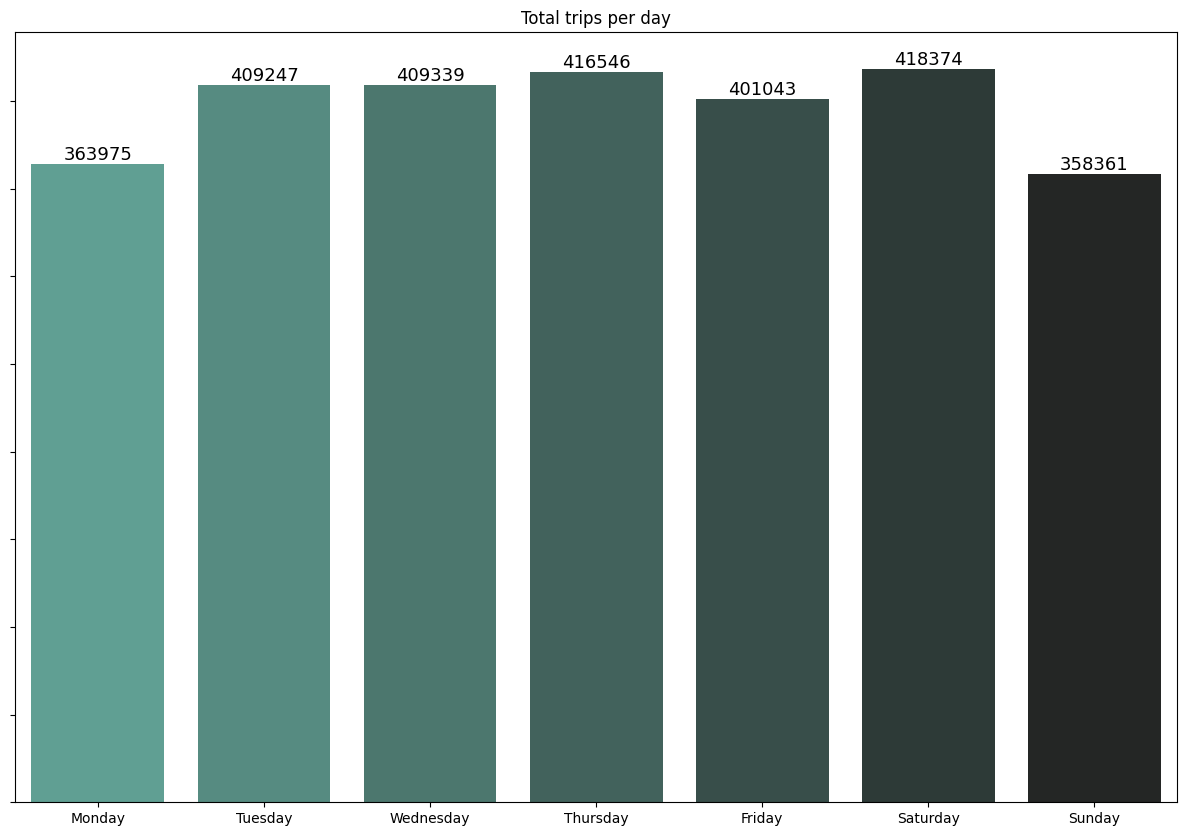

In [40]:
fig, ax = plt.subplots(figsize=(15,10));
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
colors = sns.color_palette("dark:#5A9_r", len(days))

ax = sns.barplot(data=data_viz, x='day', y='count', estimator='sum', order=days, palette=colors);
ax.bar_label(ax.containers[0], fontsize=13);
ax.set_title('Total trips per day');
ax.set(xlabel='', ylabel=None);
ax.set_yticklabels([]);

In [52]:
data_viz.groupby(['member_casual', 'day'])['count'].sum()

member_casual  day      
casual         Friday       144387
               Monday       112762
               Saturday     195389
               Sunday       160862
               Thursday     126565
               Tuesday      116214
               Wednesday    116772
member         Friday       256656
               Monday       251213
               Saturday     222985
               Sunday       197499
               Thursday     289981
               Tuesday      293033
               Wednesday    292567
Name: count, dtype: int64

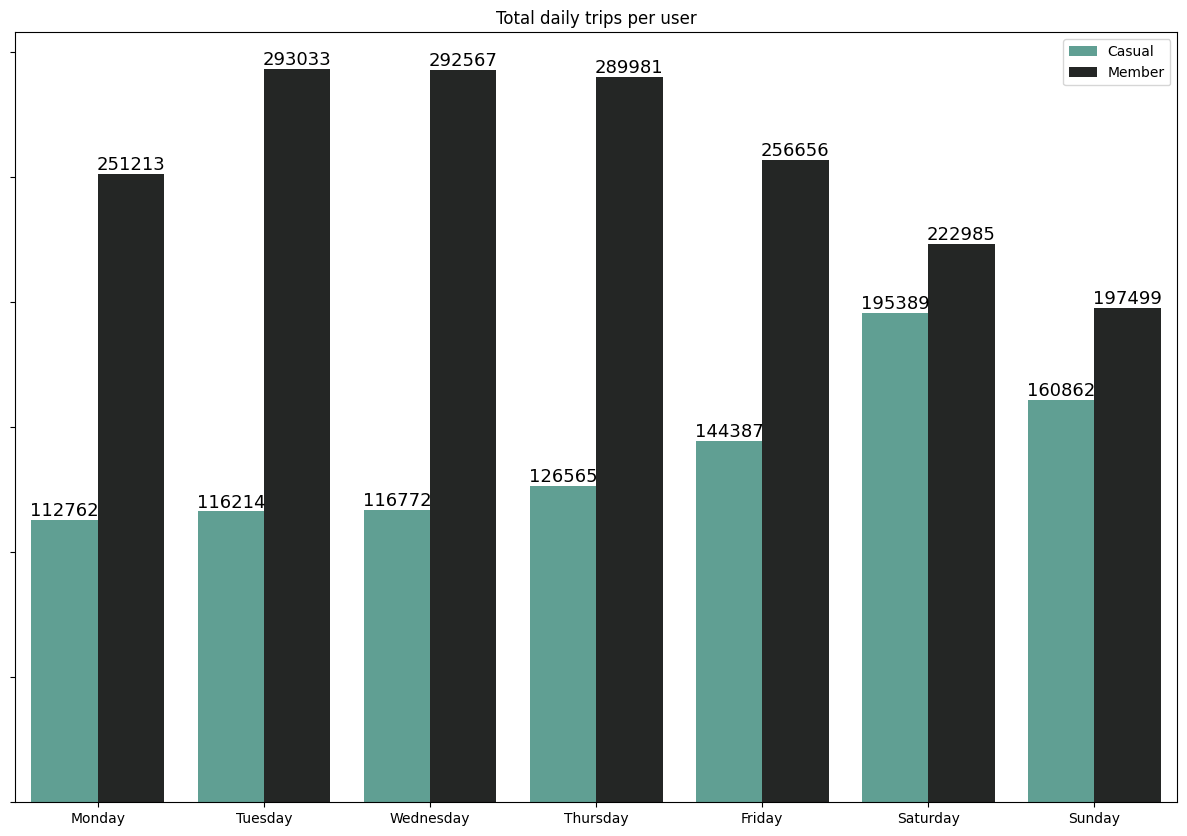

In [41]:
fig, ax = plt.subplots(figsize=(15,10))

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
colors = sns.color_palette("dark:#5A9_r", 2)

ax = sns.barplot(data=data_viz, x='day', y = 'count', estimator='sum', order=days, hue='member_casual', palette=colors)

ax.set_title('Total daily trips per user')
ax.set(ylabel=None, xlabel=None)
ax.set_yticklabels([])
ax.bar_label(ax.containers[0], fontsize=12);
ax.bar_label(ax.containers[1], fontsize=12);

plt.legend((ax.containers[0], ax.containers[1]), ('Casual', 'Member'));

## Preferred bike type per user

In [53]:
data_viz.groupby(['rideable_type', 'member_casual'])['count'].sum().unstack(1)

member_casual,casual,member
rideable_type,,
classic_bike,566485.00,1204500.00
docked_bike,51376.00,NaN
electric_bike,355090.00,599434.00


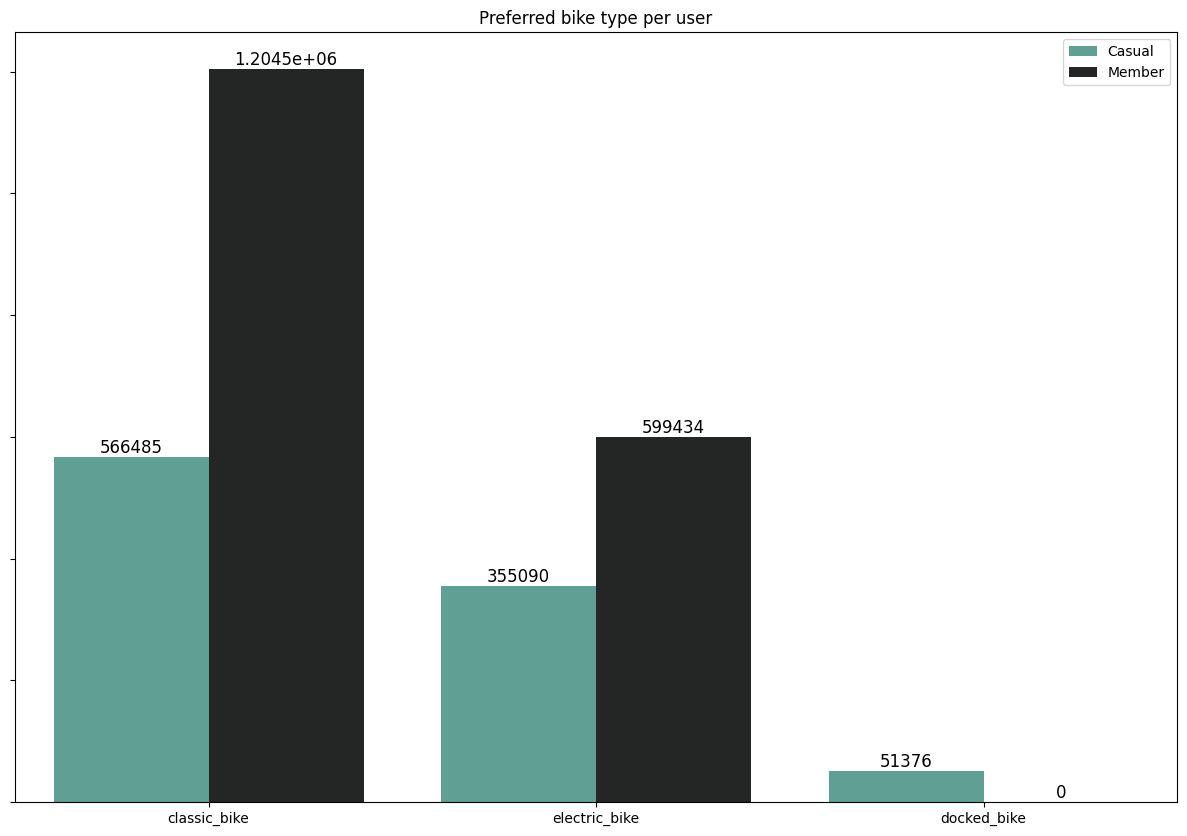

In [57]:
fig, ax = plt.subplots(figsize=(15,10));
colors = sns.color_palette("dark:#5A9_r", 2)

ax = sns.barplot(data=data_viz, x='rideable_type', y='count', estimator='sum', palette=colors, hue='member_casual')

ax.set_title('Preferred bike type per user')
ax.set(ylabel=None, xlabel=None)
ax.set_yticklabels([])
ax.bar_label(ax.containers[0], fontsize=12);
ax.bar_label(ax.containers[1], fontsize=12);

plt.legend((ax.containers[0], ax.containers[1]), ('Casual', 'Member'))
plt.show();

## Most common and busiest bicycle stations

In [64]:
top_15_start_stations = data_viz.groupby('start_name_station')['count'].sum().nlargest(15).reset_index()
top_15_start_stations

,start_name_station,count
0,Streeter Dr & Grand Ave,45342
1,Michigan Ave & Oak St,26057
2,Clark St & Elm St,24420
3,Kingsbury St & Kinzie St,23291
4,Wells St & Concord Ln,22558
5,Millennium Park,22512
6,Clinton St & Washington Blvd,22241
7,Theater on the Lake,21743
8,Ellis Ave & 60th St,21350
9,University Ave & 57th St,21229


In [66]:
top_15_end_stations = data_viz.groupby('end_name_station')['count'].sum().nlargest(15).reset_index()
top_15_end_stations

,end_name_station,count
0,Streeter Dr & Grand Ave,45438
1,Michigan Ave & Oak St,26989
2,Millennium Park,23918
3,Clark St & Elm St,23747
4,Kingsbury St & Kinzie St,23468
5,Wells St & Concord Ln,23186
6,Clinton St & Washington Blvd,23169
7,Theater on the Lake,22619
8,University Ave & 57th St,21330
9,Ellis Ave & 60th St,20960


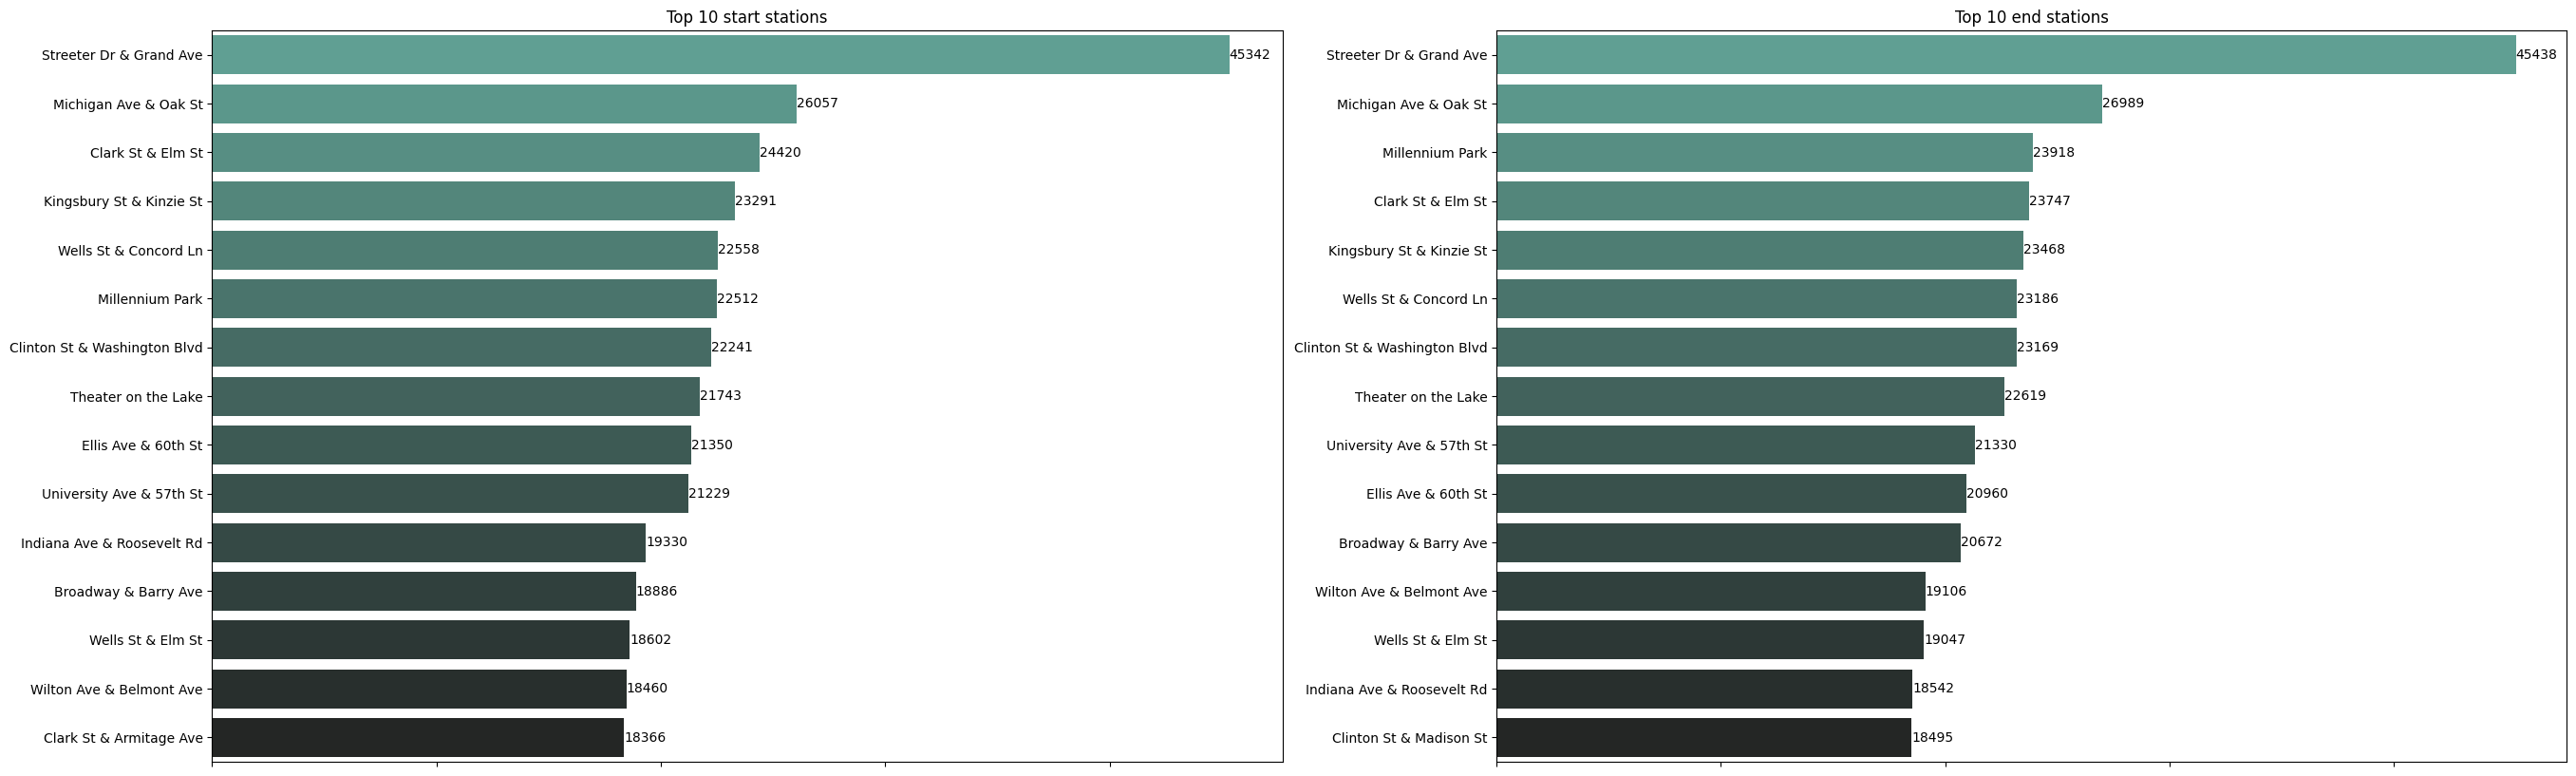

In [78]:
fig, axes = plt.subplots(1,2, figsize=(32,10), sharex=True);

colors = sns.color_palette("dark:#5A9_r", 15)

ax1 = sns.barplot(data=top_15_start_stations, x='count', y='start_name_station', palette=colors, orient='h', ax=axes[0]);
ax2 = sns.barplot(data=top_15_end_stations, x='count', y='end_name_station', palette=colors, orient='h', ax=axes[1]);

ax1.set_title('Top 15 start stations')
ax1.set_xticklabels([])
ax1.set(ylabel=None, xlabel=None)
ax1.bar_label(ax1.containers[0], fontsize=10);

ax2.set_title('Top 15 end stations')
ax2.set_xticklabels([])
ax2.set(ylabel=None, xlabel=None)
ax2.bar_label(ax2.containers[0], fontsize=10);


The main goal is to convert casual users into members, so it is a must to create a graphic of only the top 15 start and end stations for casual users to focus all strategy efforts on those stations.

In [79]:
data_viz_casual = data_viz[data_viz['member_casual'] == 'casual']
top_15_casual_tart_stations = data_viz_casual.groupby('start_name_station')['count'].sum().nlargest(15).reset_index()
top_15_casual_tart_stations

,start_name_station,count
0,Streeter Dr & Grand Ave,33472
1,Michigan Ave & Oak St,16075
2,Millennium Park,15338
3,Shedd Aquarium,13062
4,Theater on the Lake,11809
5,Dusable Harbor,11271
6,Adler Planetarium,9140
7,Indiana Ave & Roosevelt Rd,8905
8,Montrose Harbor,8841
9,Michigan Ave & 8th St,8693


In [80]:
top_15_casual_end_stations = data_viz_casual.groupby('end_name_station')['count'].sum().nlargest(15).reset_index()
top_15_casual_end_stations

,end_name_station,count
0,Streeter Dr & Grand Ave,35312
1,Millennium Park,17515
2,Michigan Ave & Oak St,17441
3,Theater on the Lake,13070
4,Shedd Aquarium,11663
5,Dusable Harbor,9652
6,Montrose Harbor,8789
7,Clark St & Lincoln Ave,8377
8,Indiana Ave & Roosevelt Rd,8325
9,Wells St & Concord Ln,8149


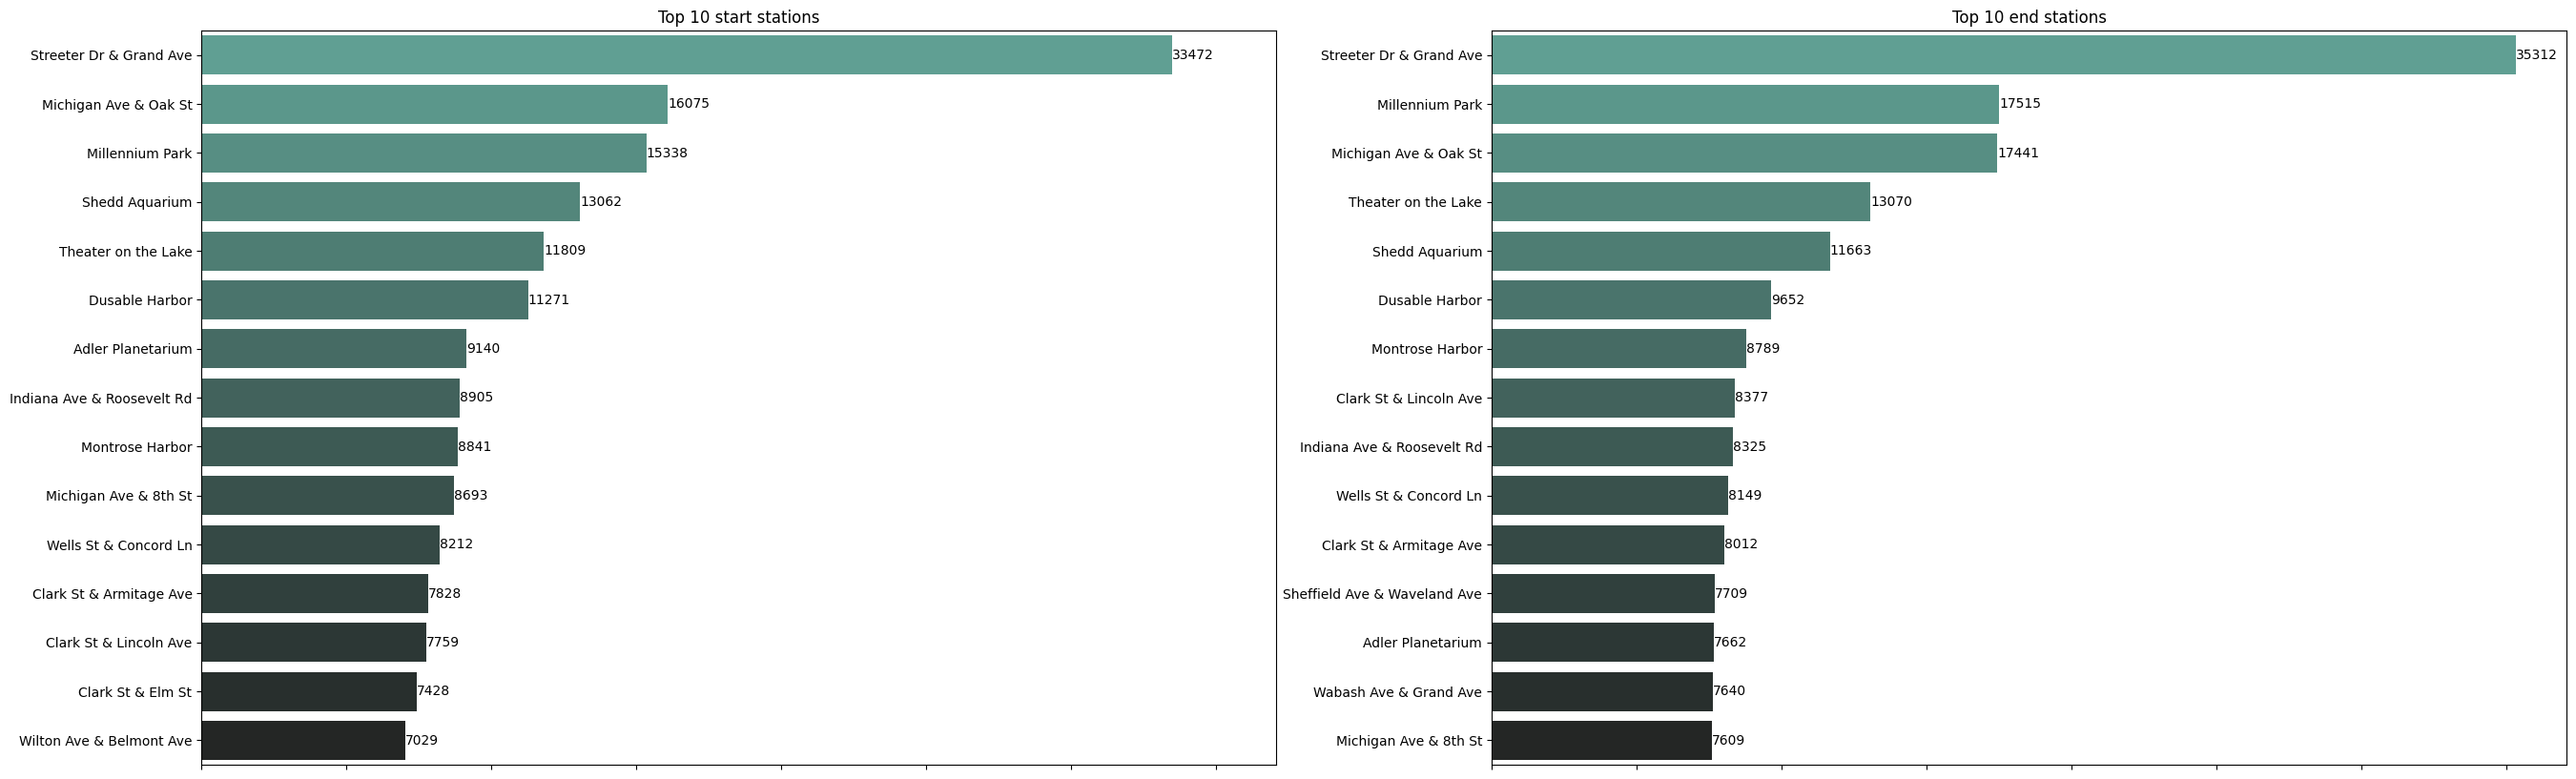

In [81]:
fig, axes = plt.subplots(1,2, figsize=(32,10), sharex=True);

colors = sns.color_palette("dark:#5A9_r", 15)

ax1 = sns.barplot(data=top_15_casual_tart_stations, x='count', y='start_name_station', palette=colors, orient='h', ax=axes[0]);
ax2 = sns.barplot(data=top_15_casual_end_stations, x='count', y='end_name_station', palette=colors, orient='h', ax=axes[1]);

ax1.set_title('Top 15 casual user start stations')
ax1.set_xticklabels([])
ax1.set(ylabel=None, xlabel=None)
ax1.bar_label(ax1.containers[0], fontsize=10);

ax2.set_title('Top 15 casual user end stations')
ax2.set_xticklabels([])
ax2.set(ylabel=None, xlabel=None)
ax2.bar_label(ax2.containers[0], fontsize=10);